**PROJECT TITLE: "House Price Prediction Using Machine Learning"**

Our project aims to develop a basic machine learning model to predict house prices based on a few key features such as the size of the house, number of bedrooms, number of bathrooms, and location. Using a dataset containing information about previously sold houses, the model will be trained to learn the relationship between these features and the selling price. The project will involve data preprocessing, feature selection, model training using regression techniques like linear regression or decision trees, and evaluation of the model's performance using metrics like mean squared error or R-squared. The goal is to create a simple yet effective predictive model that can estimate the price of a house given its characteristics.

**Project Team Members:**

1) Ramsha Akbar (SP24-MSSE-0009) 2) Yusra Ali Siddiqui (SP24-MSSE-0022)

⁹Importing Libraries:

We import necessary libraries such as NumPy (for numerical operations), Pandas (for data manipulation), scikit-learn (for machine learning), and joblib (for saving models). Creating the Dataset:

We create a dataset (DataFrame) containing information about houses such as size, number of bedrooms and bathrooms, location, and price. Splitting Location:

We split the 'Location' column into 'City' and 'Area' columns using the split function. One-Hot Encoding:

We convert categorical variables ('City' and 'Province') into numerical format using one-hot encoding. This is done to make it easier for the machine learning model to understand these categorical variables. Feature Selection:

We separate the dataset into input features (X) and target variable (y). Input features are characteristics of the houses, while the target variable is the price. Splitting Data:

We split the data into training and testing sets. The training set is used to train the model, and the testing set is used to evaluate its performance. Training the Model:

We create a RandomForestRegressor model and train it using the training data. Saving the Model:

We save the trained model to a file so that it can be reused later without needing to retrain it. Function to Predict House Price:

We define a function called 'predict_house_price' that takes input features of a house and predicts its price using the trained model. User Interface:

We create a simple user interface using a while loop. It prompts the user to enter details about a house and then displays the estimated price using the 'predict_house_price' function. The loop continues until the user chooses to exit.

In [103]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
# Load the dataset into a DataFrame
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/zameen-updated.csv')

In [105]:
# Importing Pandas library for data manipulation and analysis
import pandas as pd

# Importing NumPy library for numerical operations
import numpy as np

# Importing Seaborn for statistical data visualization
import seaborn as sns

# Importing Matplotlib's pyplot module for creating plots
import matplotlib.pyplot as plt

# Importing the CSV module for reading and writing CSV files
import csv

# Importing train_test_split function for splitting datasets
from sklearn.model_selection import train_test_split

# Importing StandardScaler for standardizing features
from sklearn.preprocessing import StandardScaler

# Importing LinearRegression for linear regression
from sklearn.linear_model import LinearRegression


# Importing evaluation metrics for classification models
from sklearn.metrics import mean_squared_error

In [106]:
# Print the data types of each column
print(df.dtypes)

property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
area              object
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
Area Type         object
Area Size        float64
Area Category     object
dtype: object


In [107]:
# Display information about the DataFrame, such as the number of non-null entries
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

None

In [108]:
# Print the value counts of each column
for column in df.columns:
    print(df[column].value_counts())

property_id
237062      1
17003540    1
17003653    1
17003693    1
17003703    1
           ..
15650436    1
15653801    1
15653811    1
15653818    1
17355287    1
Name: count, Length: 168446, dtype: int64
location_id
1483     2955
9030     1695
329      1670
1482     1520
1448     1443
         ... 
12972       1
3392        1
12145       1
639         1
13689       1
Name: count, Length: 4198, dtype: int64
page_url
https://www.zameen.com/Property/g_10_g_10_2_ground_floor_corner_apartment_with_green_lawn_for_sale-237062-3325-1.html                                                             1
https://www.zameen.com/Property/d_h_a_dha_phase_6_500_yard_beautifull_bunglow_for_rent_in_prime_location-17003540-1483-4.html                                                     1
https://www.zameen.com/Property/d_h_a_dha_phase_6_1000_yard_must_prime_location_in_dha_phase_6_with_pool_and_basement-17003653-1483-4.html                                        1
https://www.zameen.com/Property/dha_v

In [109]:
# Print the number of dimensions of the DataFrame
df.ndim

2

In [110]:
# Print the shape (number of rows and columns) of the DataFrame
df.shape

(168446, 20)

In [111]:
# Check for duplicate rows in the DataFrame
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
168441    False
168442    False
168443    False
168444    False
168445    False
Length: 168446, dtype: bool

In [112]:
# Print the values of the DataFrame as a NumPy array
df.values

array([[237062, 3325,
        'https://www.zameen.com/Property/g_10_g_10_2_ground_floor_corner_apartment_with_green_lawn_for_sale-237062-3325-1.html',
        ..., 'Marla', 4.0, '0-5 Marla'],
       [346905, 3236,
        'https://www.zameen.com/Property/e_11_2_services_society_flat_available_for_sale-346905-3236-1.html',
        ..., 'Marla', 5.6, '5-10 Marla'],
       [386513, 764,
        'https://www.zameen.com/Property/islamabad_g_15_house_is_available_for_sale-386513-764-1.html',
        ..., 'Marla', 8.0, '5-10 Marla'],
       ...,
       [17355250, 6757,
        'https://www.zameen.com/Property/gulshan_e_maymar_gulshan_e_maymar_sector_u_ground_1st_floor_house_is_available_for_sale-17355250-6757-1.html',
        ..., 'Marla', 9.6, '5-10 Marla'],
       [17355251, 6752,
        'https://www.zameen.com/Property/gulshan_e_maymar_gulshan_e_maymar_sector_p_1st_floor_flat_is_available_for_sale-17355251-6752-1.html',
        ..., 'Marla', 7.8, '5-10 Marla'],
       [17355287, 10045,
  

In [113]:
# Count the number of non-NA/null entries for each column
df.count()

property_id      168446
location_id      168446
page_url         168446
property_type    168446
price            168446
location         168446
city             168446
province_name    168446
latitude         168446
longitude        168446
baths            168446
area             168446
purpose          168446
bedrooms         168446
date_added       168446
agency           124375
agent            124374
Area Type        168446
Area Size        168446
Area Category    168446
dtype: int64

In [114]:
# Display the DataFrame
display(df)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


In [115]:
# Display descriptive statistics for the DataFrame
display(df.describe())

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


In [116]:
pd.DataFrame(df)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


In [117]:
# Display the shape of the DataFrame
print(df.shape)


(168446, 20)


In [118]:
# Drop rows with missing values
df = df.dropna()

In [87]:
# Print the shape of the DataFrame after dropping missing values
df.shape

(124374, 20)

In [119]:
# Display the DataFrame
df=display(df)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
7,1258636,3241,https://www.zameen.com/Property/e_11_e_11_4_ap...,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,6.2 Marla,For Sale,2,05-05-2019,Ettemad Enterprises,Balqiaz Marwat,Marla,6.2,5-10 Marla
8,1402466,376,https://www.zameen.com/Property/dha_defence_dh...,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,1 Kanal,For Sale,7,10-19-2018,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Kanal,1.0,1-5 Kanal
9,1418706,3282,https://www.zameen.com/Property/f_11_f_11_1_f_...,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,1 Kanal,For Sale,5,06-27-2019,Crown Associate,Abrar Ahmed,Kanal,1.0,1-5 Kanal
10,1425602,429,https://www.zameen.com/Property/islamabad_dipl...,Flat,35000000,Diplomatic Enclave,Islamabad,Islamabad Capital,33.728873,73.119628,3,7.1 Marla,For Sale,3,06-03-2019,Al Sahar Estate,Zahid H. Usmani,Marla,7.1,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


In [138]:
# Drop unnecessary columns from the DataFrame, handling cases where columns might not exist
columns_to_drop = ['property_id', 'location_id', 'page_url', 'latitude', 'longitude', 'property_type', 'location', 'area', 'purpose', 'date_added', 'agency', 'agent', 'Area Type', 'Area Category']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, errors='ignore')


# Display the first few rows of the DataFrame to verify changes
print(df.head())

        Price  Bathrooms  Bedrooms  Size  City_Faisalabad  City_Islamabad  \
0   7000000.0          3         3   8.0            False            True   
1   7800000.0          2         2   6.2            False            True   
2  50000000.0          7         7   1.0            False            True   
3  40000000.0          5         5   1.0            False            True   
4  35000000.0          3         3   7.1            False            True   

   City_Karachi  City_Lahore  City_Rawalpindi  Province_Islamabad Capital  \
0         False        False            False                        True   
1         False        False            False                        True   
2         False        False            False                        True   
3         False        False            False                        True   
4         False        False            False                        True   

   Province_Punjab  Province_Sindh  
0            False           False  


In [139]:
# Display descriptive statistics for the DataFrame
display(df.describe())

,Price,Bathrooms,Bedrooms,Size
count,1.343740e+05,134374.000000,134374.000000,134374.000000
mean,1.776433e+07,2.771913,3.133947,210.634092
std,3.643241e+07,2.490553,1.916814,804.667091
min,0.000000e+00,0.000000,0.000000,0.000000
25%,7.500000e+04,0.000000,2.000000,3.000000
50%,8.000000e+06,3.000000,3.000000,5.000000
75%,1.970000e+07,4.000000,4.000000,10.000000
max,2.000000e+09,403.000000,68.000000,4999.000000


from matplotlib import pyplot as plt
_df_11['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Bathrooms'].plot(kind='hist', bins=20, title='Bathrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Bedrooms'].plot(kind='hist', bins=20, title='Bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Size'].plot(kind='hist', bins=20, title='Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='Price', y='Bathrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Bathrooms', y='Bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Bedrooms', y='Size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Bathrooms'].plot(kind='line', figsize=(8, 4), title='Bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Bedrooms'].plot(kind='line', figsize=(8, 4), title='Bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Size'].plot(kind='line', figsize=(8, 4), title='Size')
plt.gca().spines[['top', 'right']].set_visible(False)

In [136]:
# Print the shape of the DataFrame after dropping unnecessary columns
df.shape


(134374, 12)

In [144]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/zameen-updated.csv')

# Preprocess the data
df = df.dropna()
df = df[['price', 'city', 'province_name', 'baths', 'bedrooms', 'Area Size']]
df.columns = ['Price', 'City', 'Province', 'Bathrooms', 'Bedrooms', 'Size']

# Generate synthetic data
num_rows = 10000
sizes = np.random.randint(500, 5000, num_rows)
bedrooms = np.random.randint(1, 6, num_rows)
bathrooms = np.random.randint(1, 5, num_rows)
cities = df['City'].unique()
provinces = df['Province'].unique()
prices = np.random.uniform(1, 20, num_rows)

synthetic_data = {
    'Size': sizes,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'City': np.random.choice(cities, num_rows),
    'Province': np.random.choice(provinces, num_rows),
    'Price': prices
}

synthetic_df = pd.DataFrame(synthetic_data)
df = pd.concat([df, synthetic_df], ignore_index=True)

# Save the original DataFrame for visualization purposes
df_original = df.copy()

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['City', 'Province'], prefix=['City', 'Province'])

# Feature selection
X = df.drop(['Price'], axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'house_price_prediction_model.pkl')

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Function to predict house price
def predict_house_price(size, bedrooms, bathrooms, city, province):
    input_data = np.array([[size, bedrooms, bathrooms]])
    input_data = np.append(input_data, [[1 if col == f'City_{city}' else 0 for col in X.columns if col.startswith('City_')]], axis=1)
    input_data = np.append(input_data, [[1 if col == f'Province_{province}' else 0 for col in X.columns if col.startswith('Province_')]], axis=1)
    predicted_price = model.predict(input_data.reshape(1, -1))
    return predicted_price[0]

# User interface
print("Welcome to the House Price Prediction System!")
print("Enter house details (or 'quit' to exit):")
while True:
    size = int(input("Size of the house (sqft): "))
    if size <= 0:
        print("Size must be a positive number. Please try again.")
        continue
    bedrooms = int(input("Number of bedrooms: "))
    if bedrooms <= 0:
        print("Number of bedrooms must be a positive integer. Please try again.")
        continue
    bathrooms = int(input("Number of bathrooms: "))
    if bathrooms <= 0:
        print("Number of bathrooms must be a positive integer. Please try again.")
        continue
    city = input("City: ")
    province = input("Province: ")
    price_prediction = predict_house_price(size, bedrooms, bathrooms, city, province)
    print(f"Estimated price of the house: PKR {price_prediction:.2f}")
    if input("Continue? (yes/no): ").lower() != "yes":
        print("Exiting the House Price Prediction System. Goodbye!")
        break



Mean Squared Error: 850452493386309.5
R-squared: 0.3572292201918724
Welcome to the House Price Prediction System!
Enter house details (or 'quit' to exit):
Size of the house (sqft): 1000
Number of bedrooms: 3
Number of bathrooms: 3
City: karachi
Province: sindh


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Estimated price of the house: PKR 7579577.73
Continue? (yes/no): no
Exiting the House Price Prediction System. Goodbye!


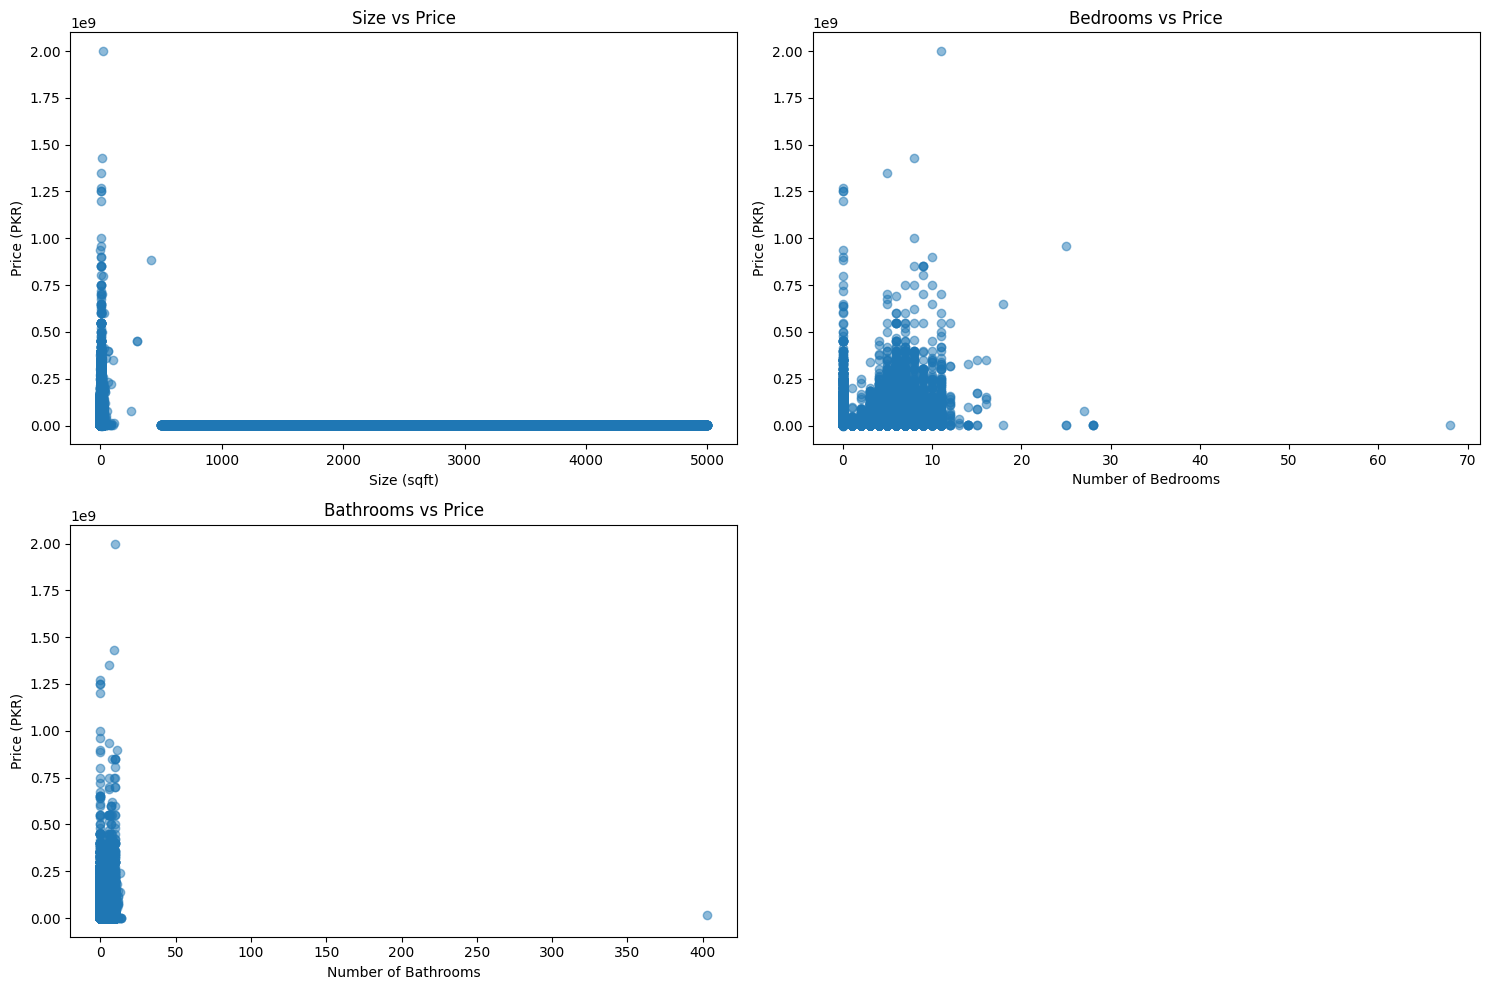

In [145]:
# Visualization
plt.figure(figsize=(15, 10))

# Scatter Plot: Size vs Price
plt.subplot(2, 2, 1)
plt.scatter(df_original['Size'], df_original['Price'], alpha=0.5)
plt.title('Size vs Price')
plt.xlabel('Size (sqft)')
plt.ylabel('Price (PKR)')

# Scatter Plot: Bedrooms vs Price
plt.subplot(2, 2, 2)
plt.scatter(df_original['Bedrooms'], df_original['Price'], alpha=0.5)
plt.title('Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (PKR)')

# Scatter Plot: Bathrooms vs Price
plt.subplot(2, 2, 3)
plt.scatter(df_original['Bathrooms'], df_original['Price'], alpha=0.5)
plt.title('Bathrooms vs Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (PKR)')

plt.tight_layout()
plt.show()

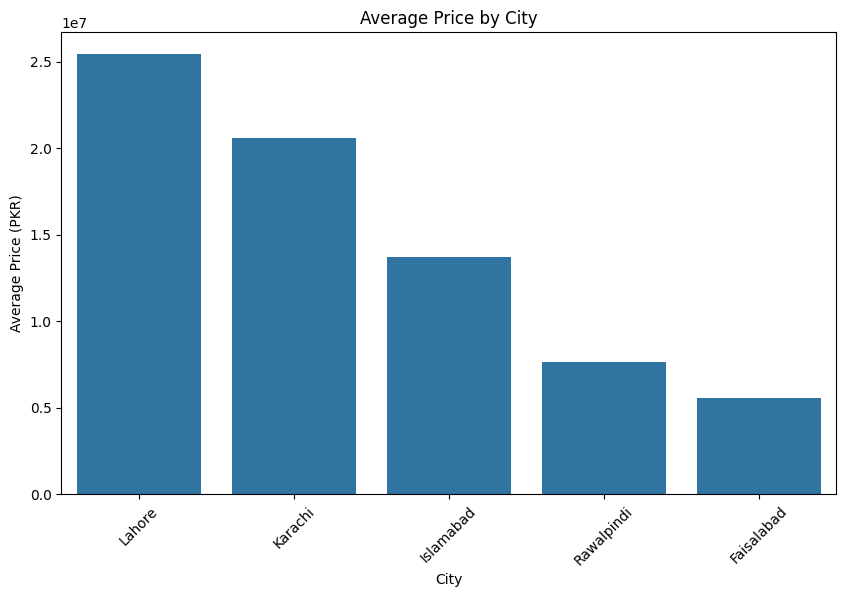

In [146]:
# Bar graph: Average Price by City
avg_price_by_city = df_original.groupby('City')['Price'].mean().reset_index().sort_values('Price', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Price', data=avg_price_by_city)
plt.title('Average Price by City')
plt.xlabel('City')
plt.ylabel('Average Price (PKR)')
plt.xticks(rotation=45)
plt.show()

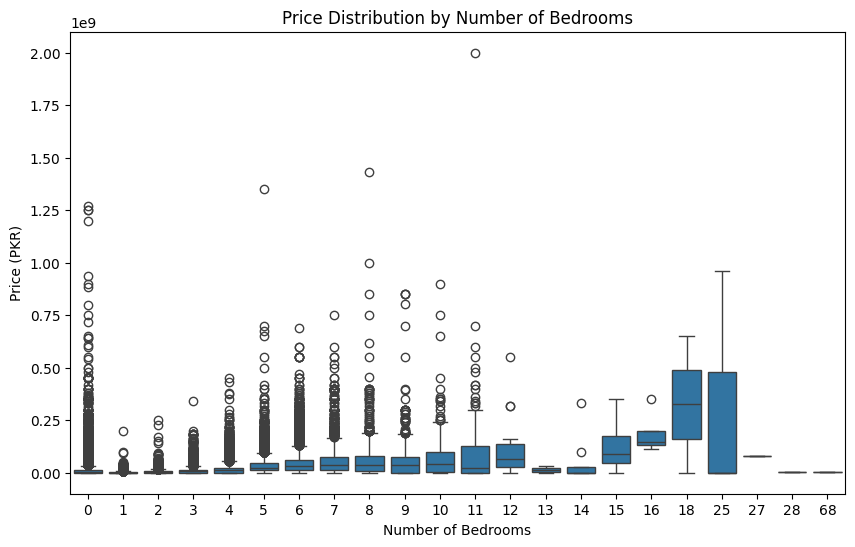

In [147]:
# Box plot: Price distribution by Number of Bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bedrooms', y='Price', data=df_original)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (PKR)')
plt.show()

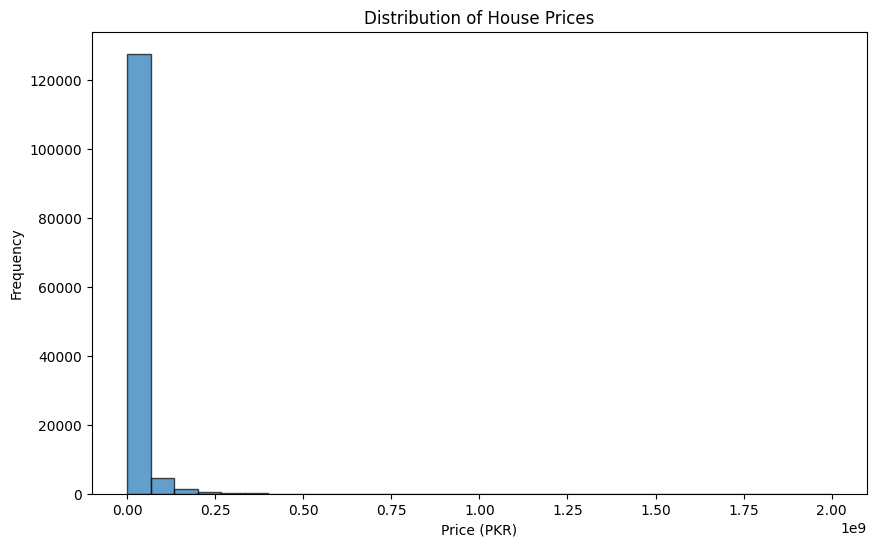

In [148]:
# Histogram: Distribution of House Prices
plt.figure(figsize=(10, 6))
plt.hist(df_original['Price'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of House Prices')
plt.xlabel('Price (PKR)')
plt.ylabel('Frequency')
plt.show()

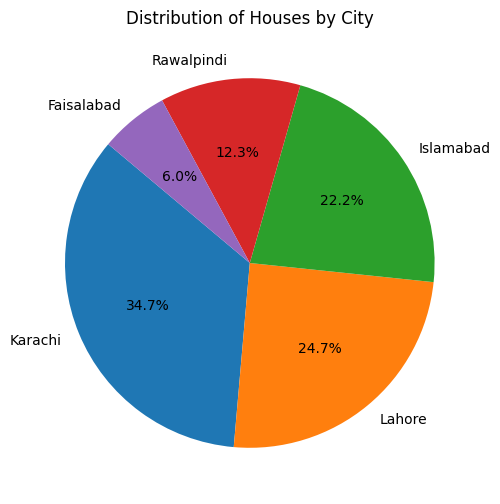

In [149]:
# Pie chart: Distribution of Houses by City
house_counts_by_city = df_original['City'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(house_counts_by_city, labels=house_counts_by_city.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Houses by City')
plt.show()

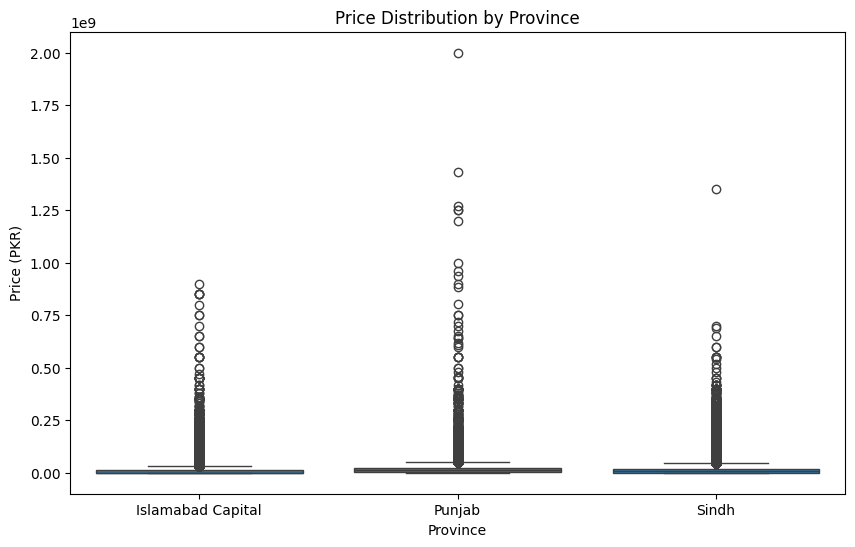

In [150]:
# Box plot: Price distribution by Province
plt.figure(figsize=(10, 6))
sns.boxplot(x='Province', y='Price', data=df_original)
plt.title('Price Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Price (PKR)')
plt.show()

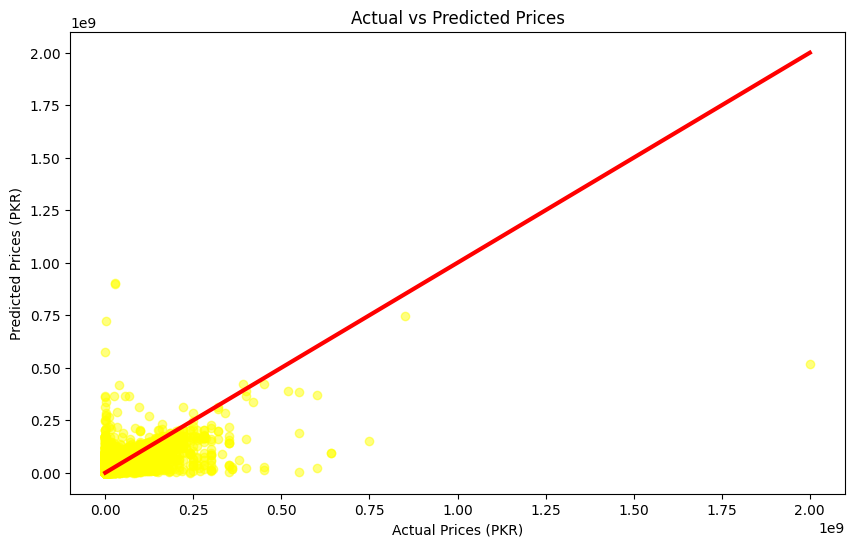

In [151]:
# Scatter Plot with Line: Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="yellow", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=3)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices (PKR)')
plt.ylabel('Predicted Prices (PKR)')
plt.show()

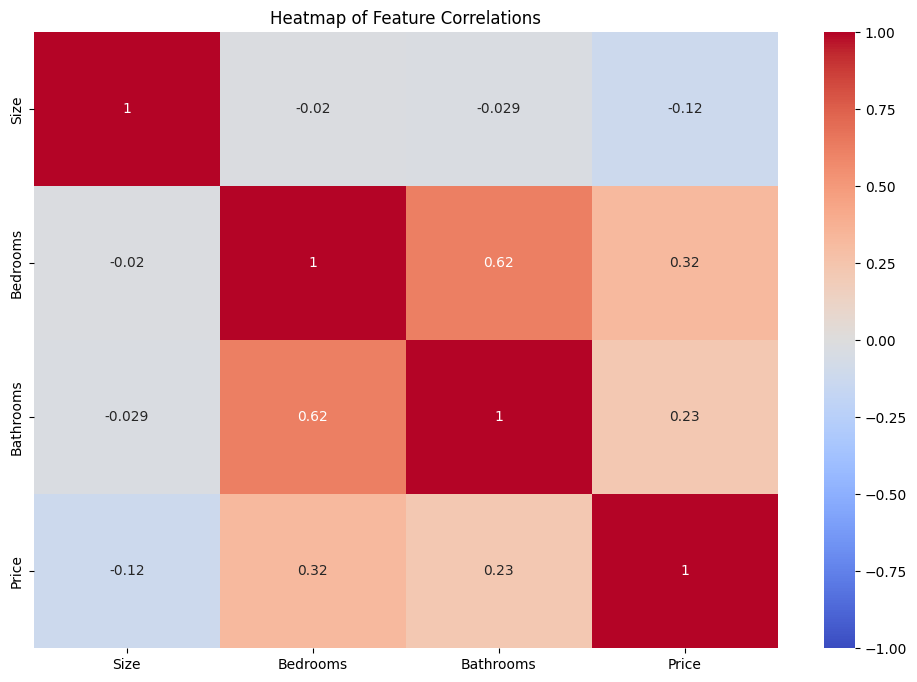

In [152]:
# Heatmap: Correlation between Features
plt.figure(figsize=(12, 8))
corr_matrix = df_original[['Size', 'Bedrooms', 'Bathrooms', 'Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Feature Correlations')
plt.show()